# Graph structure generation demo

## Overview

In this notebbok we compare the performance (throughput) of graph structure generators presented in the SynGen tool. 

The graph generator can run on both CPU and GPU, hence we provide cells to run throughput test on either.

Available generators:

1. [Exact RMAT generator (GPU)](#1)
1. [Exact RMAT generator (CPU)](#2)
1. [Approximate RMAT generator (GPU)](#3)
1. [Approximate RMAT generator (CPU)](#4)

In [1]:
# Generator
from syngen.generator.graph import RMATGenerator

# Others
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import set_loglevel
set_loglevel('warning')

import time
from itertools import product

In [2]:
def get_xy(data):
    x = [edges for edges, _, _ in data]
    y = [eps for _, eps, _ in data]
    return x, y

## Exact generator

In  the cell below a graph with 6.8e6 nodes and 168e3 edges is generated. 

<a id="1"></a>
### GPU

We instantiate a `RMATGenerator` and ensure that it will use a GPU mode.

In [3]:
static_graph_generator=RMATGenerator()
static_graph_generator.gpu=True

Provide the RMAT probability matrix for graph generation.

In [4]:
static_graph_generator._fit_results = 0.4, 0.25, 0.2, 0.15

In [5]:
%%time

start = time.perf_counter()
data_proper = static_graph_generator.generate(num_nodes=6_797_556, 
                                              num_edges=168_114, 
                                              is_directed=False, 
                                              has_self_loop=False)
elapsed = time.perf_counter() - start

print(elapsed)

7.293178725987673
CPU times: user 6.46 s, sys: 828 ms, total: 7.29 s
Wall time: 7.29 s


Additional throughput tests for varying node/edge scaling sizes.

In [6]:
n_range = [15, 20, 30, 40]
n_range = [2 ** x for x in n_range]

edges_range = [1e6, 1e7, 1e8]
edges_range = [int(x // 2) for x in edges_range]

gpu_res = {
    int(np.log2(n)): [] for n in n_range
}

# Random run
data_proper = static_graph_generator.generate(num_nodes=168_114, 
                                              num_edges=6_797_556, 
                                              is_directed=False, 
                                              has_self_loop=False)

for n, edges in product(n_range, edges_range):
    max_edges = (n * (n - 1)) // 2
    density = edges / max_edges
    
    

    if density > 0.75:
        res = "FAIL"
    else:
        res = "GOOD"
        
    f_string = f"{n:<13} | {edges:<13} | {density:>8.3f} | {res}"
    print(f_string)
    
    if res == "FAIL":
        continue
    
    start = time.perf_counter()
    data_proper = static_graph_generator.generate(num_nodes=n, 
                                                  num_edges=edges, 
                                                  is_directed=False, 
                                                  has_self_loop=False)
    elapsed = time.perf_counter() - start
    gen_edges = data_proper.shape[0]
    edges_per_second = data_proper.shape[0] / elapsed
    
    calculated = (gen_edges, edges_per_second, elapsed)
    f_string = f"{n:<13} | {edges:<13} | {edges_per_second}"
    print(f_string)

    
    l = gpu_res[int(np.log2(n))]
    l.append(calculated)
    

32768         | 500000        |    0.001 | GOOD
32768         | 500000        | 30149058.191003423
32768         | 5000000       |    0.009 | GOOD
32768         | 5000000       | 66238388.90034665
32768         | 50000000      |    0.093 | GOOD
32768         | 50000000      | 41812037.20361726
1048576       | 500000        |    0.000 | GOOD
1048576       | 500000        | 18619575.259240218
1048576       | 5000000       |    0.000 | GOOD
1048576       | 5000000       | 59722279.57953148
1048576       | 50000000      |    0.000 | GOOD
1048576       | 50000000      | 53988712.53175938
1073741824    | 500000        |    0.000 | GOOD
1073741824    | 500000        | 19100514.208435934
1073741824    | 5000000       |    0.000 | GOOD
1073741824    | 5000000       | 56473505.243410945
1073741824    | 50000000      |    0.000 | GOOD
1073741824    | 50000000      | 41909925.854350075
1099511627776 | 500000        |    0.000 | GOOD
1099511627776 | 500000        | 19101824.4671729
1099511627776 | 

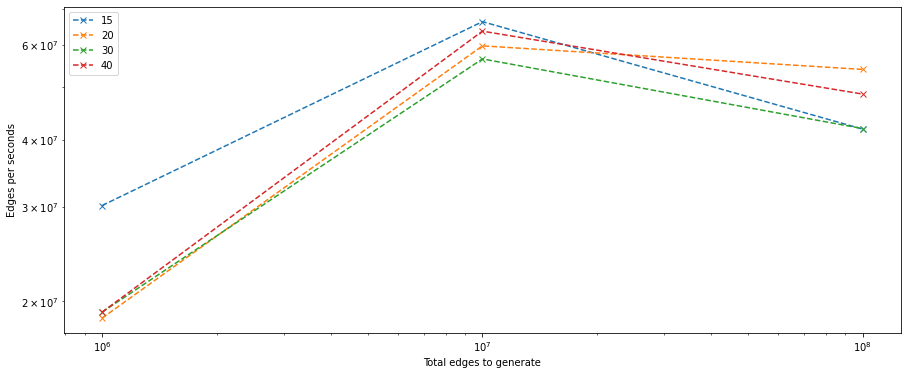

In [7]:
plt.figure(figsize=(15, 6))
for n, data in gpu_res.items():
    x, y = get_xy(data)
    plt.plot(x, y, '--x', label=f'{n}')
    plt.xlabel('Total edges to generate') 
    plt.ylabel('Edges per seconds')
    
    plt.legend()

    plt.legend()
    plt.yscale('log')
    plt.xscale('log')

<a id="2"></a>
### CPU

Similar as the GPU setup, instead the generator device is set to CPU.

In [8]:
static_graph_generator=RMATGenerator()
static_graph_generator.gpu=False

In [9]:
static_graph_generator._fit_results = 0.4, 0.25, 0.2, 0.15

In [10]:
n_range = [15, 20, 30, 40]
n_range = [2 ** x for x in n_range]

edges_range = [1e6, 1e7, 1e8]
edges_range = [int(x // 2) for x in edges_range]

cpu_res = {
    int(np.log2(n)): [] for n in n_range
}

# Random run
data_proper = static_graph_generator.generate(num_nodes=168_114, 
                                              num_edges=6_797_556, 
                                              is_directed=False, 
                                              has_self_loop=False)

for n, edges in product(n_range, edges_range):
    max_edges = (n * (n - 1)) // 2
    density = edges / max_edges
    
    

    if density > 0.75:
        res = "FAIL"
    else:
        res = "GOOD"
        
    f_string = f"{n:<13} | {edges:<13} | {density:>8.3f} | {res}"
    print(f_string)
    
    if res == "FAIL":
        continue
    
    start = time.perf_counter()
    data_proper = static_graph_generator.generate(num_nodes=n, 
                                                  num_edges=edges, 
                                                  is_directed=False, 
                                                  has_self_loop=False)
    elapsed = time.perf_counter() - start
    gen_edges = data_proper.shape[0]
    edges_per_second = data_proper.shape[0] / elapsed
    
    calculated = (gen_edges, edges_per_second, elapsed)
    f_string = f"{n:<13} | {edges:<13} | {edges_per_second}"
    print(f_string)

    
    l = cpu_res[int(np.log2(n))]
    l.append(calculated)
    

Getting egdes


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]


Removing selfloops
32768         | 500000        |    0.001 | GOOD
Getting egdes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.21it/s]


Removing selfloops
32768         | 500000        | 286622.14685093396
32768         | 5000000       |    0.009 | GOOD
Getting egdes


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.23it/s]


Removing selfloops
32768         | 5000000       | 231044.87284503193
32768         | 50000000      |    0.093 | GOOD
Getting egdes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [02:01<00:00,  1.24it/s]


Removing selfloops
32768         | 50000000      | 199421.84570897938
1048576       | 500000        |    0.000 | GOOD
Getting egdes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.13s/it]


Removing selfloops
1048576       | 500000        | 254579.08768802948
1048576       | 5000000       |    0.000 | GOOD
Getting egdes


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:16<00:00,  1.09s/it]


Removing selfloops
1048576       | 5000000       | 215829.47480641145
1048576       | 50000000      |    0.000 | GOOD
Getting egdes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [02:42<00:00,  1.08s/it]


Removing selfloops
1048576       | 50000000      | 185111.12465822973
1073741824    | 500000        |    0.000 | GOOD
Getting egdes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.65s/it]


Removing selfloops
1073741824    | 500000        | 218091.72153399212
1073741824    | 5000000       |    0.000 | GOOD
Getting egdes


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:24<00:00,  1.61s/it]


Removing selfloops
1073741824    | 5000000       | 190558.21969355037
1073741824    | 50000000      |    0.000 | GOOD
Getting egdes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [04:00<00:00,  1.60s/it]


Removing selfloops
1073741824    | 50000000      | 165485.3641681028
1099511627776 | 500000        |    0.000 | GOOD
Getting egdes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.23s/it]


Removing selfloops
1099511627776 | 500000        | 185084.37433352097
1099511627776 | 5000000       |    0.000 | GOOD
Getting egdes


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:32<00:00,  2.15s/it]


Removing selfloops
1099511627776 | 5000000       | 164205.47140813377
1099511627776 | 50000000      |    0.000 | GOOD
Getting egdes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [05:22<00:00,  2.15s/it]


Removing selfloops
1099511627776 | 50000000      | 146195.08370605359


We can plot the throughput in terms of number of edges generated per second for the varying scales as depicted below.

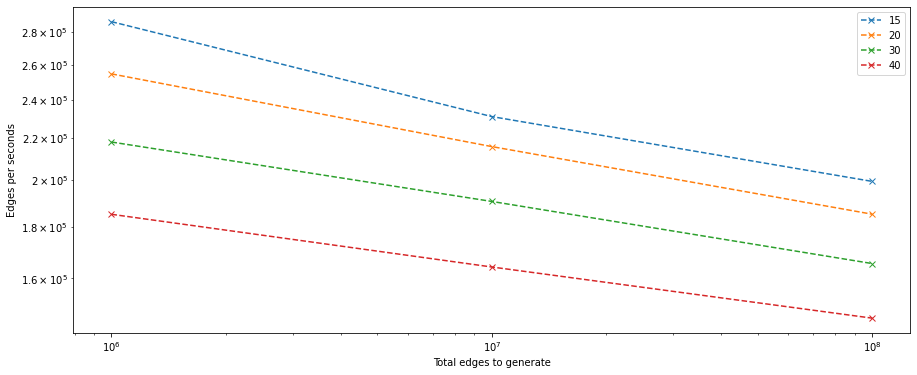

In [11]:
plt.figure(figsize=(15, 6))
for n, data in cpu_res.items():
    x, y = get_xy(data)
    plt.plot(x, y, '--x', label=f'{n}')
    plt.xlabel('Total edges to generate') 
    plt.ylabel('Edges per seconds')
    
    plt.legend()

    plt.legend()
    plt.yscale('log')
    plt.xscale('log')

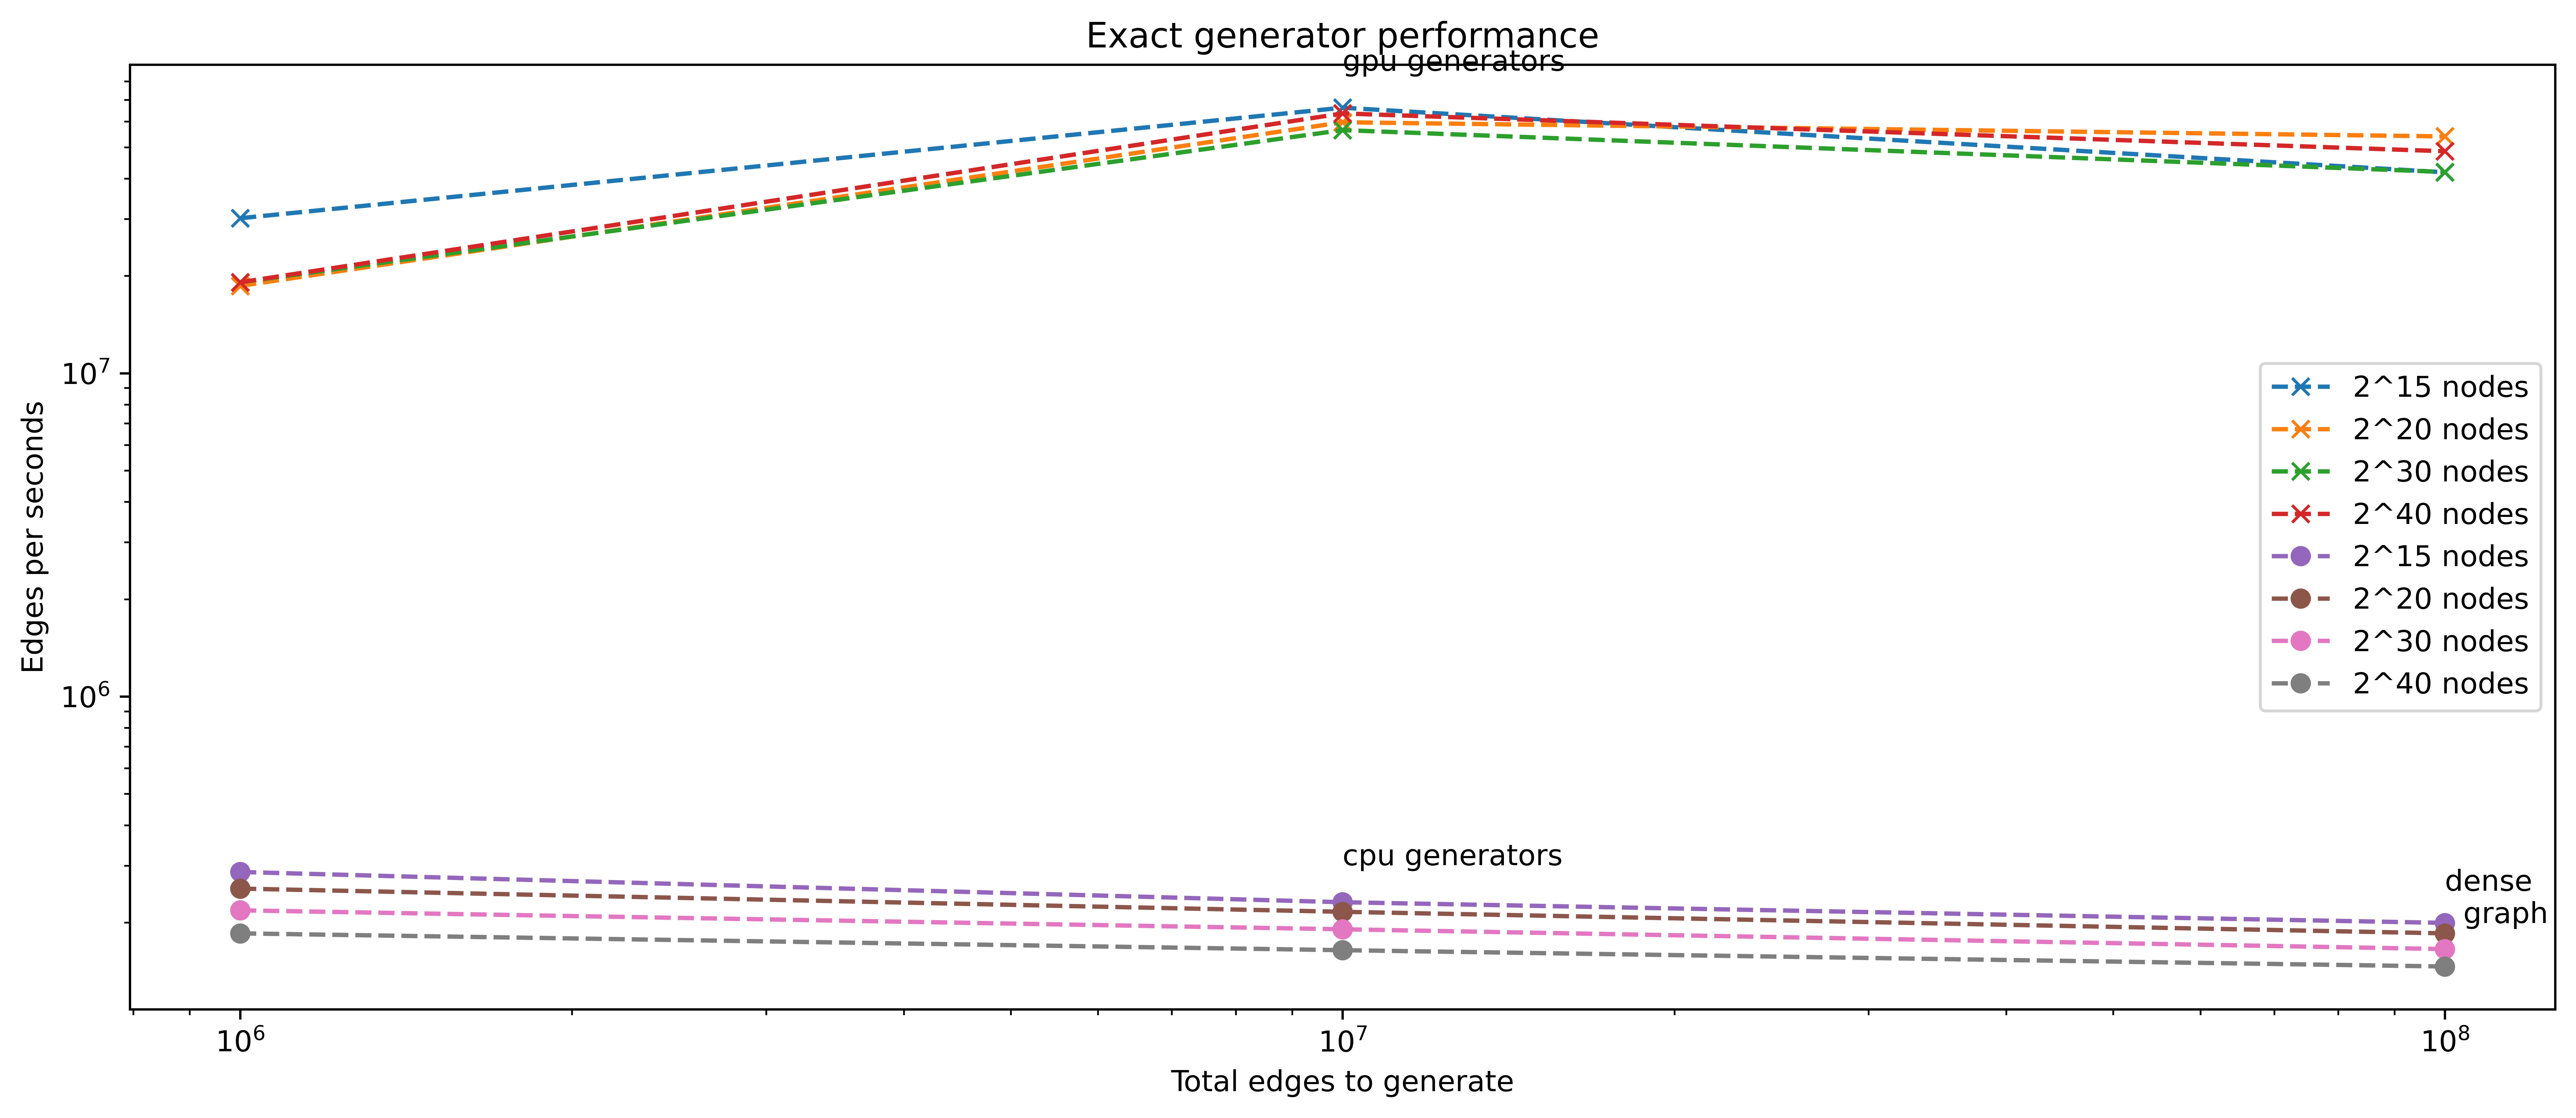

In [12]:
plt.figure(figsize=(15, 6), dpi=800)
for n, data in gpu_res.items():
    x, y = get_xy(data)
    plt.plot(x, y, '--x', label=f'2^{n} nodes')

for n, data in cpu_res.items():
    x, y = get_xy(data)
    plt.plot(x, y, '--o', label=f'2^{n} nodes')

plt.annotate('dense \n  graph', (cpu_res[15][2][0], cpu_res[15][2][1]))
plt.annotate('gpu generators', (gpu_res[15][1][0], gpu_res[15][1][1]+2e7))
plt.annotate('cpu generators', (cpu_res[15][1][0], cpu_res[15][1][1]+7e4))



plt.title('Exact generator performance') 
plt.xlabel('Total edges to generate') 
plt.ylabel('Edges per seconds')
plt.legend()
plt.yscale('log')
plt.xscale('log')

# plt.savefig("myImage.png", format="png", dpi=800)
plt.show()

## Approximate generator

<a id="3"></a>
### GPU

In [13]:
import cupy as cp
import numpy as np
from pylibraft.random import rmat

def generate_gpu_rmat_approx(a, b, c, d,
                      r_scale, c_scale,
                      n_edges,
                      noise=0.5):
    gen_graph = None
    theta_len = max(r_scale, c_scale) * 4

    base_theta = [a, b, c, d]
    if noise > 0:
        full_theta = []
        for i in range(theta_len):
            noise_uniform = noise * np.random.uniform(-1, 1, size=len(base_theta))
            noise_to_add = np.multiply(base_theta, noise_uniform)
            theta_n = base_theta + noise_to_add
            theta_n = theta_n / np.sum(theta_n)
            full_theta.append(theta_n)
    else:
        full_theta = base_theta * theta_len

    theta_cpu = np.array(full_theta, dtype=np.float32)
    theta = cp.asarray(theta_cpu)
    tmp = cp.empty((n_edges, 2), dtype=cp.int32)
    rmat(tmp, theta, r_scale, c_scale)
    
    return tmp

In [14]:
a, b, c, d = 0.4, 0.25, 0.2, 0.15

In [15]:
n_range = [15, 20, 30, 40]

edges_range = [1e6, 1e7, 1e8]
edges_range = [int(x) for x in edges_range]

gpu_res_approx = {
    n: [] for n in n_range
}

# Random run
data_proper = generate_gpu_rmat_approx(a, b, c, d,
                      18, 18,
                      6_797_556)

for n, edges in product(n_range, edges_range):
    max_edges = (2**n * (2**n - 1)) // 2
    density = edges / max_edges
    
    

    if density > 0.75:
        res = "FAIL"
    else:
        res = "GOOD"
        
    f_string = f"{n:<13} | {edges:<13} | {density:>8.3f} | {res}"
    print(f_string)
    
    if res == "FAIL":
        continue
    
    start = time.perf_counter()
    data_proper = generate_gpu_rmat_approx(a, b, c, d, n, n, edges)
    elapsed = time.perf_counter() - start
    
    gen_edges = data_proper.shape[0]
    edges_per_second = data_proper.shape[0] / elapsed
    
    calculated = (gen_edges, edges_per_second, elapsed)
    f_string = f"{n:<13} | {edges:<13} | {edges_per_second}"
    print(f_string)

    
    l = gpu_res_approx[n]
    l.append(calculated)

15            | 1000000       |    0.002 | GOOD
15            | 1000000       | 377547944.6467425
15            | 10000000      |    0.019 | GOOD
15            | 10000000      | 3439822034.506443
15            | 100000000     |    0.186 | GOOD
15            | 100000000     | 10374072572.588627
20            | 1000000       |    0.000 | GOOD
20            | 1000000       | 289573449.06111413
20            | 10000000      |    0.000 | GOOD
20            | 10000000      | 2347738204.042579
20            | 100000000     |    0.000 | GOOD
20            | 100000000     | 8372976699.124822
30            | 1000000       |    0.000 | GOOD
30            | 1000000       | 210283128.73126873
30            | 10000000      |    0.000 | GOOD
30            | 10000000      | 1739389479.7683368
30            | 100000000     |    0.000 | GOOD
30            | 100000000     | 5645229391.272711
40            | 1000000       |    0.000 | GOOD
40            | 1000000       | 155410336.2012518
40            | 

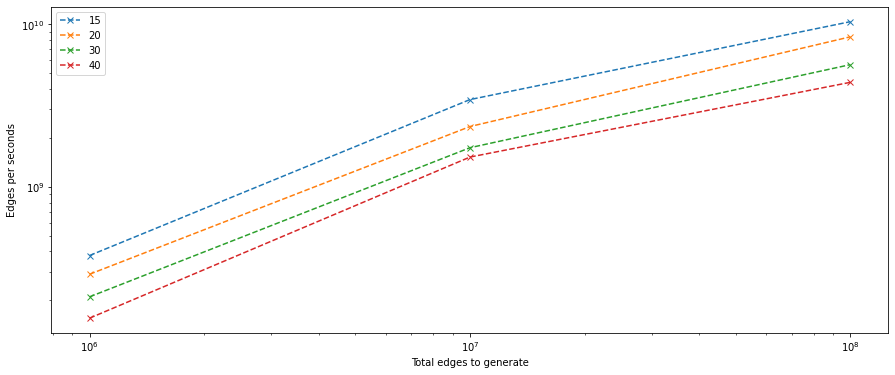

In [16]:
plt.figure(figsize=(15, 6))
for n, data in gpu_res_approx.items():
    x, y = get_xy(data)
    plt.plot(x, y, '--x', label=f'{n}')
    plt.xlabel('Total edges to generate') 
    plt.ylabel('Edges per seconds')
    
    plt.legend()

    plt.legend()
    plt.yscale('log')
    plt.xscale('log')

<a id="4"></a>
### CPU

In [17]:
from syngen.generator.graph.utils import effective_nonsquare_rmat_approximate 

In [18]:
a, b, c, d = 0.4, 0.25, 0.2, 0.15
theta = np.array([[a, b], [c, d]])
theta /= a + b + c + d

In [19]:
part, _, _ = effective_nonsquare_rmat_approximate(
        theta,
        6_797_556,
        (18, 18),
        noise_scaling=0.5,
        batch_size=1_000_000,
        dtype=np.int64,
        custom_samplers=None,
        generate_back_edges=False
    )

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.93s/it]


In [20]:
part.shape

(6797556, 2)

In [21]:
n_range = [15, 20, 30, 40]
#n_range = [2 ** x for x in n_range]

edges_range = [1e6, 1e7, 1e8]
edges_range = [int(x) for x in edges_range]

cpu_res_approx = {
    n: [] for n in n_range
}

# Random run
part, _, _ = effective_nonsquare_rmat_approximate(
        theta,
        6_797_556,
        (18, 18),
        noise_scaling=0.5,
        batch_size=1_000_000,
        dtype=np.int64,
        custom_samplers=None,
        generate_back_edges=False
    )

for n, edges in product(n_range, edges_range):
    max_edges = (2**n * (2**n - 1)) // 2
    density = edges / max_edges
    
    

    if density > 0.75:
        res = "FAIL"
    else:
        res = "GOOD"
        
    f_string = f"{n:<13} | {edges:<13} | {density:>8.3f} | {res}"
    print(f_string)
    
    if res == "FAIL":
        continue
    
    start = time.perf_counter()
    data_proper, _, _ = effective_nonsquare_rmat_approximate(
        theta,
        edges,
        (n, n),
        noise_scaling=0.5,
        batch_size=1_000_000,
        dtype=np.int64,
        custom_samplers=None,
        generate_back_edges=False
    )
    elapsed = time.perf_counter() - start
    
    gen_edges = data_proper.shape[0]
    edges_per_second = data_proper.shape[0] / elapsed
    
    calculated = (gen_edges, edges_per_second, elapsed)
    f_string = f"{n:<13} | {edges:<13} | {edges_per_second}"
    print(f_string)

    
    l = cpu_res_approx[n]
    l.append(calculated)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.93s/it]


15            | 1000000       |    0.002 | GOOD


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


15            | 1000000       | 598743.1903602927
15            | 10000000      |    0.019 | GOOD


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.60s/it]


15            | 10000000      | 625014.7747632738
15            | 100000000     |    0.186 | GOOD


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:42<00:00,  1.63s/it]


15            | 100000000     | 615010.6596347046
20            | 1000000       |    0.000 | GOOD


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.26s/it]


20            | 1000000       | 425055.51696833596
20            | 10000000      |    0.000 | GOOD


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.17s/it]


20            | 10000000      | 459605.83053238585
20            | 100000000     |    0.000 | GOOD


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:33<00:00,  2.14s/it]


20            | 100000000     | 467651.7660398217
30            | 1000000       |    0.000 | GOOD


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.35s/it]


30            | 1000000       | 289359.8013957824
30            | 10000000      |    0.000 | GOOD


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.22s/it]


30            | 10000000      | 310214.21684405487
30            | 100000000     |    0.000 | GOOD


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:17<00:00,  3.18s/it]


30            | 100000000     | 314738.7339784047
40            | 1000000       |    0.000 | GOOD


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.37s/it]


40            | 1000000       | 222316.41207967116
40            | 10000000      |    0.000 | GOOD


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.24s/it]


40            | 10000000      | 235354.96102985306
40            | 100000000     |    0.000 | GOOD


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:07<00:00,  4.27s/it]

40            | 100000000     | 234091.36246754852


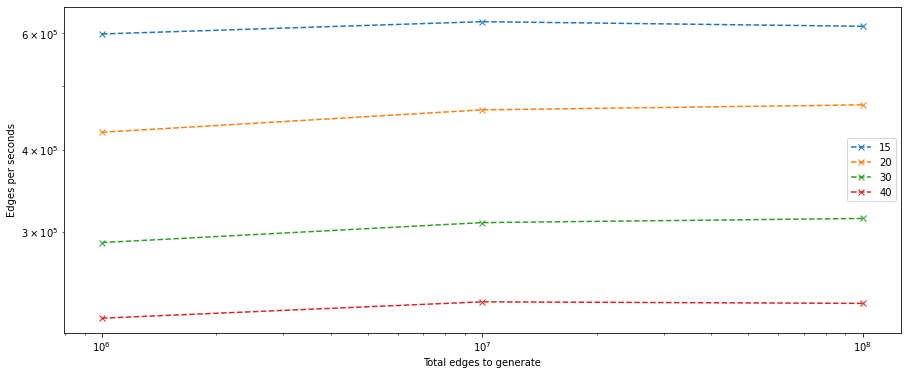

In [22]:
plt.figure(figsize=(15, 6))
for n, data in cpu_res_approx.items():
    x, y = get_xy(data)
    plt.plot(x, y, '--x', label=f'{n}')
    plt.xlabel('Total edges to generate') 
    plt.ylabel('Edges per seconds')
    
    plt.legend()

    plt.legend()
    plt.yscale('log')
    plt.xscale('log')

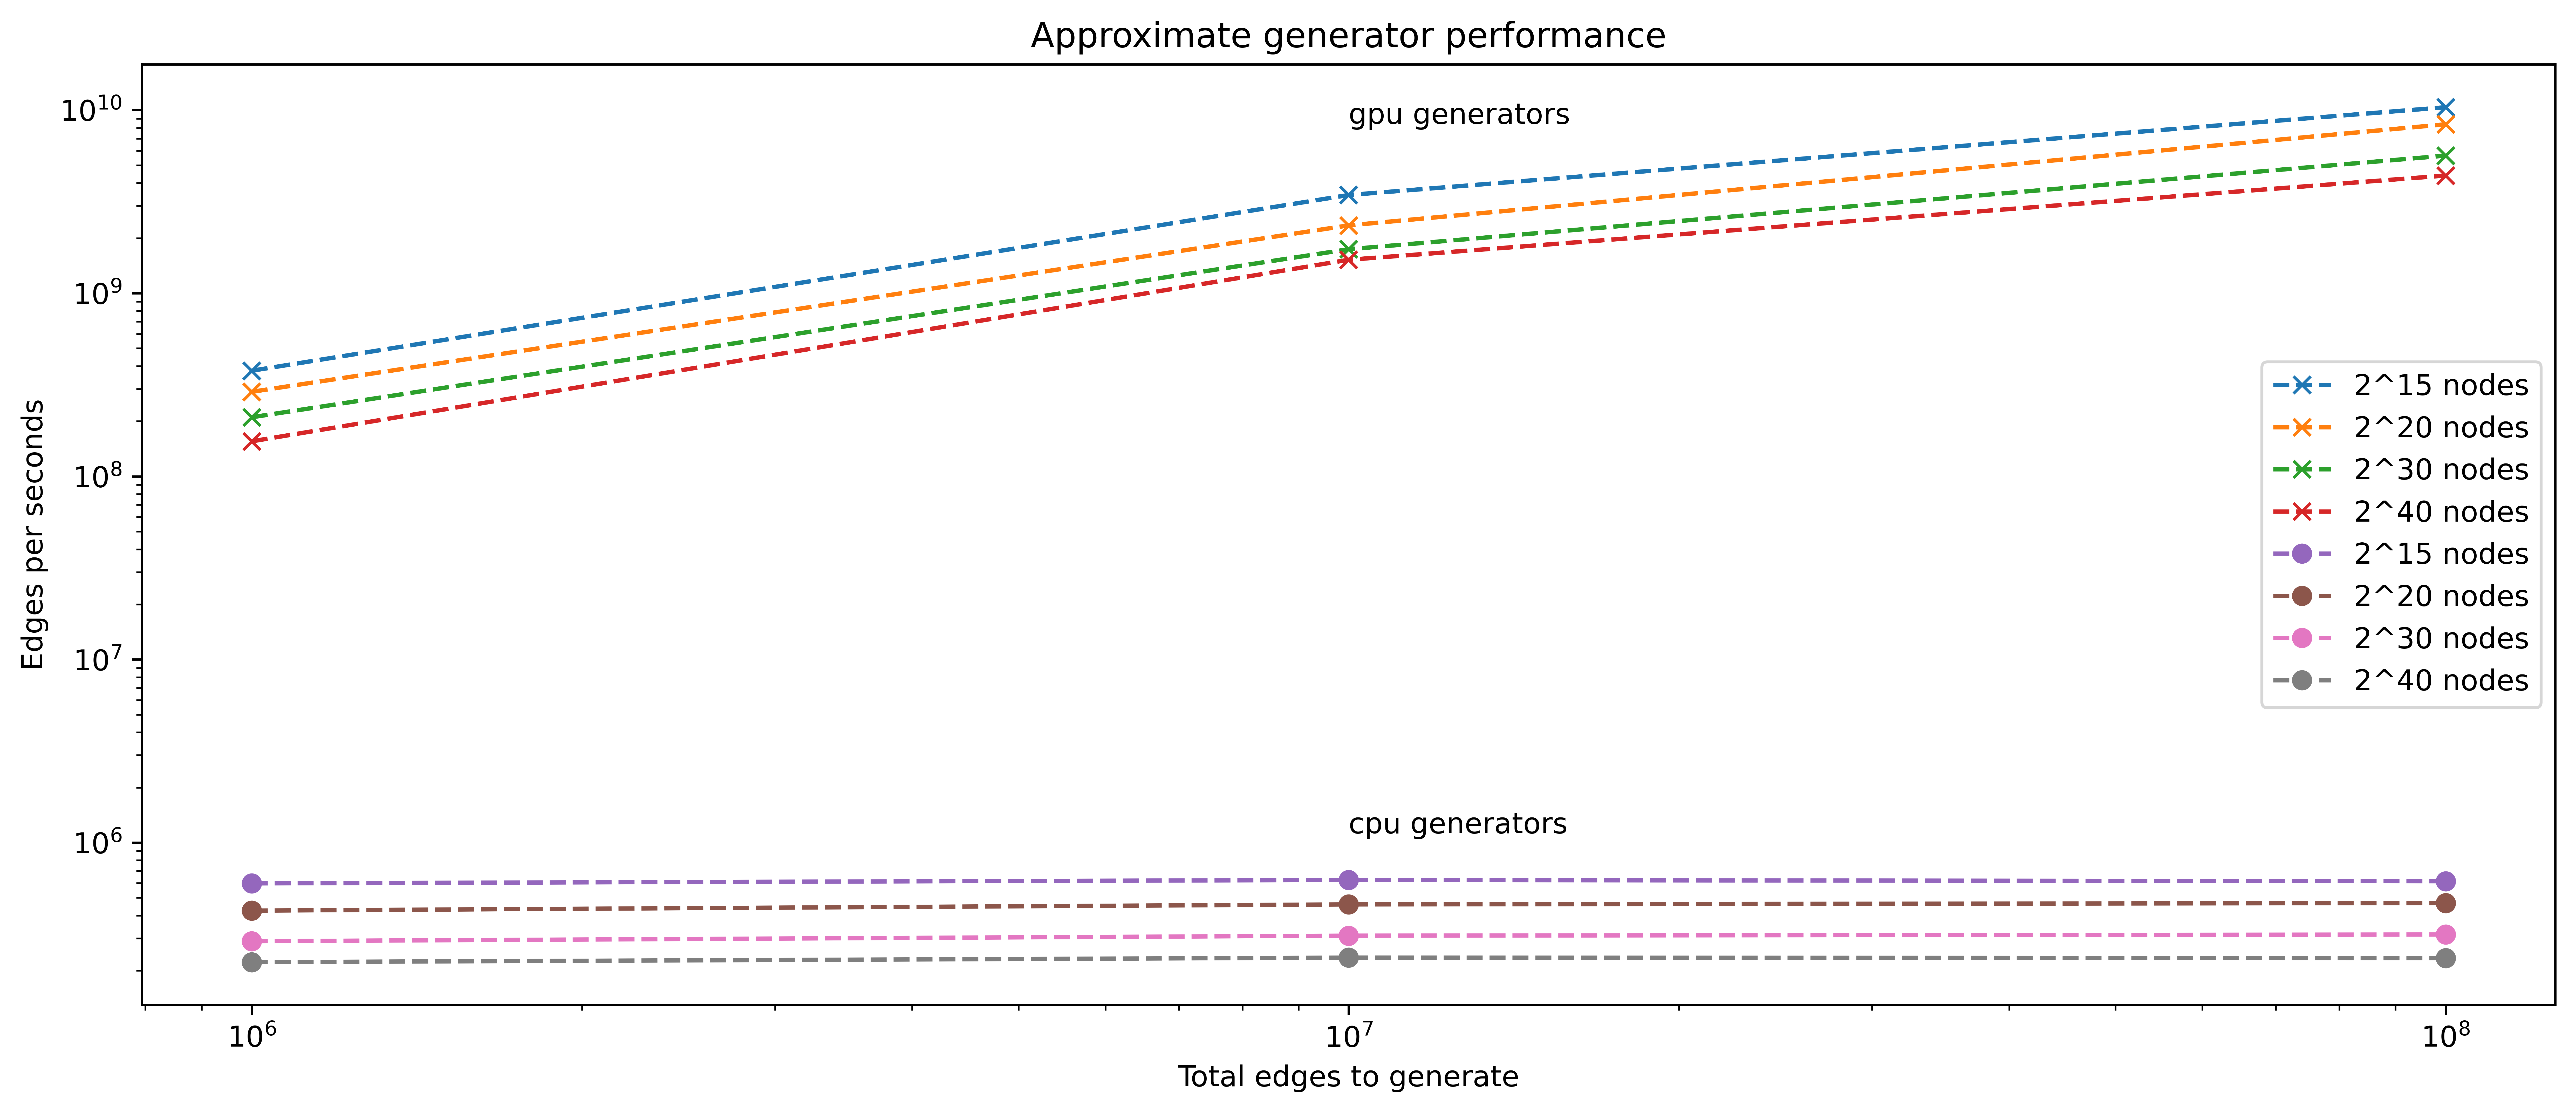

In [24]:
plt.figure(figsize=(15, 6), dpi=800)
for n, data in gpu_res_approx.items():
    x, y = get_xy(data)
    plt.plot(x, y, '--x', label=f'2^{n} nodes')

for n, data in cpu_res_approx.items():
    x, y = get_xy(data)
    plt.plot(x, y, '--o', label=f'2^{n} nodes')

plt.annotate('gpu generators', (gpu_res_approx[15][1][0], gpu_res_approx[15][1][1]+5e9))
plt.annotate('cpu generators', (cpu_res_approx[15][1][0], cpu_res_approx[15][1][1]+5e5))


plt.title('Approximate generator performance') 
plt.xlabel('Total edges to generate') 
plt.ylabel('Edges per seconds')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.savefig("/workspace/img/edge_perf.png")
plt.show()